## Importing Libraries

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Problem Statement

## Importing Dataset

In [2]:
# Importing the dataset
bank=pd.read_csv('bank-full.csv',sep=';')
bank                                   #I have used sep, as the file contains delimeters to separate the values of excel data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## STATISTICAL ANALYSIS

In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
bank.shape

(45211, 17)

In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## EDA

### Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data

In [9]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: >

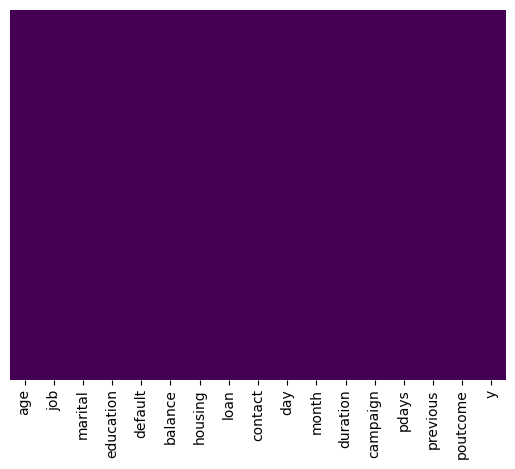

In [10]:
sns.heatmap(bank.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In this dataset we cannot get missing values

In [15]:
#Now we visualizing the data "y" -> Whether the client has subscribed a term deposit or not

<Axes: xlabel='y', ylabel='count'>

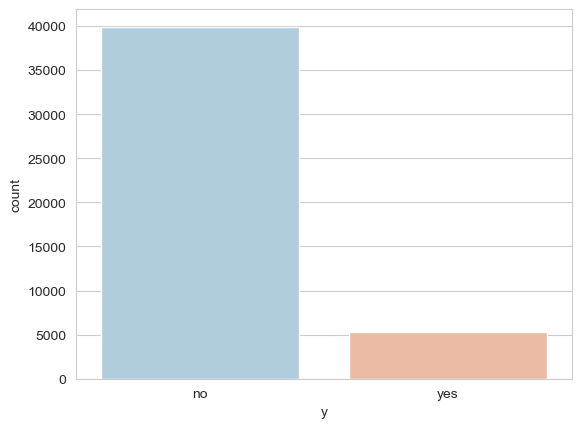

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='y',data=bank,palette='RdBu_r')

In [17]:
# Above plot says that term deposit not subscribed is more than subscribed.
# univarate - analysis of 1 column
# bivate - anaylyss of 2 colums

<Axes: xlabel='y', ylabel='count'>

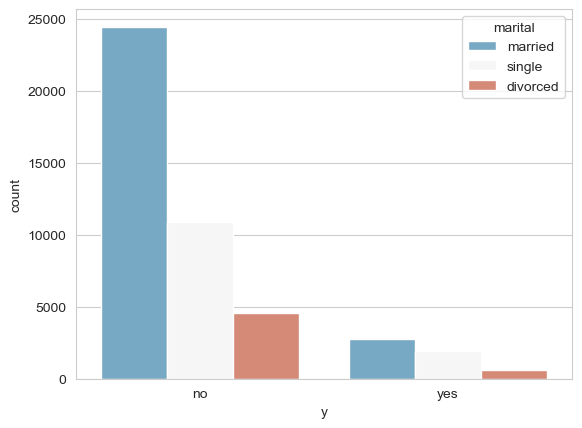

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='y',hue='marital',data=bank,palette='RdBu_r')

In [ ]:
# Above plot says that term deposit not subscribed are more married peoples as compare to others.

<Axes: >

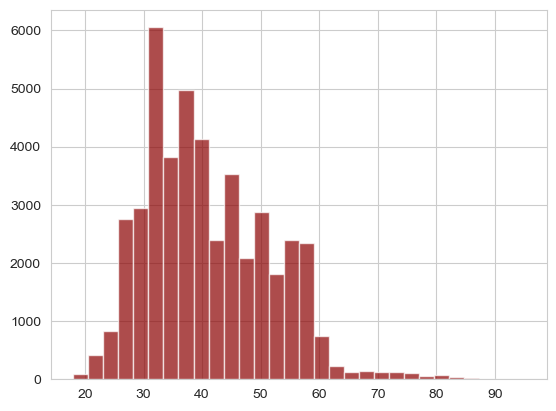

In [20]:
bank["age"].hist(bins=30,color='darkred',alpha=0.7)

In [ ]:
#From above histogram we can say that maximamly peoples are in between 30 to 50 age

<Axes: xlabel='marital', ylabel='age'>

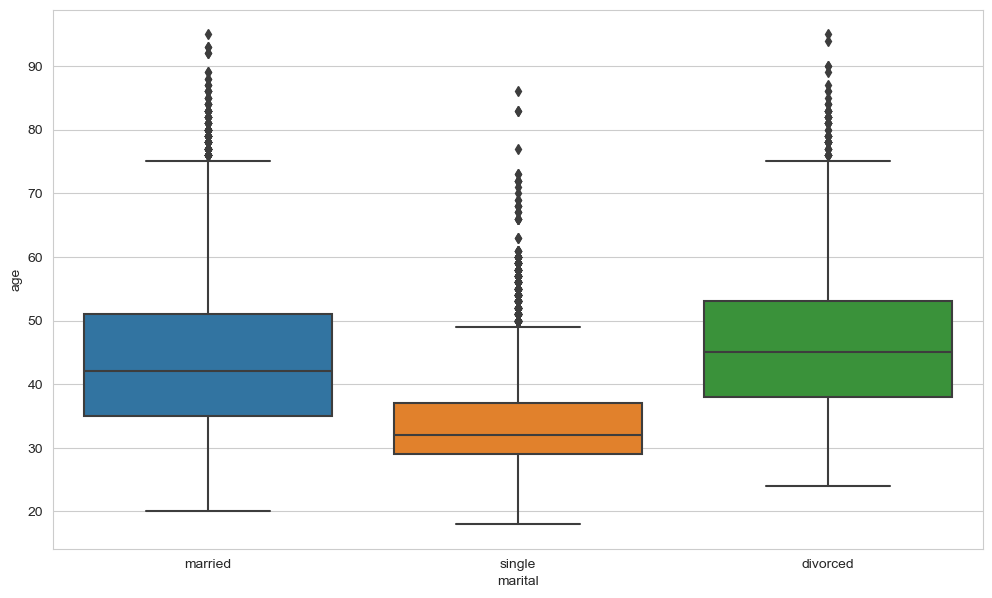

In [23]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='marital',y='age',data=bank,palette='tab10')

In [ ]:
#From this above boxplot we can say that average age of married peoples is approx. 43, single is 32 and divorced is aprrox. 46.

## Converting Categorical Features

In [8]:
# Changing the categorical value to numrical by creating dummies
bank1=pd.get_dummies(bank,columns=['job','marital','default','housing','loan','education','contact','poutcome','month'])
bank1['y']=bank1['y'].replace('yes',1)
bank1['y']=bank1['y'].replace('no',0)
bank1

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,1729,17,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,5715,17,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,668,17,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [9]:
# For Checking is the data types after change
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   y                    45211 non-null  int64
 8   job_admin.           45211 non-null  uint8
 9   job_blue-collar      45211 non-null  uint8
 10  job_entrepreneur     45211 non-null  uint8
 11  job_housemaid        45211 non-null  uint8
 12  job_management       45211 non-null  uint8
 13  job_retired          45211 non-null  uint8
 14  job_self-employed    45211 non-null  uint8
 15  job_services         45211 non-null  uint8
 16  job_student          4

## Model Building

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Dividing our data into input and output variables
x=pd.concat([bank1.iloc[:,0:7],bank1.iloc[:,8:]],axis=1)
y=bank1.iloc[:,7]

In [12]:
x.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [15]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Prediction 

In [16]:
# Checking the model score or accuracy
model.score(x_train,y_train)

0.8941252801698714

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
pred=model.predict(x)
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.61      0.23      0.33      5289

    accuracy                           0.89     45211
   macro avg       0.76      0.61      0.64     45211
weighted avg       0.87      0.89      0.87     45211



In [19]:
# Confusion Matrix for the model accuracy
cm = confusion_matrix(y,pred)
cm

array([[39131,   791],
       [ 4067,  1222]], dtype=int64)

## Model  Evaluation

In [20]:
# Checking model score by confusion matrix
(39120+1196)/(39120+1196+4093+802)

0.8917298887438898

In [21]:
df=pd.DataFrame({'actual':y,'prediction':pred})
df

,actual,prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [22]:
# Our accuracy = 0.891, which is greater than 0.5
# So [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0 
model.predict_proba(x)[:,1]

array([0.03455844, 0.01911726, 0.01509895, ..., 0.72166232, 0.09606915,
       0.13160952])

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

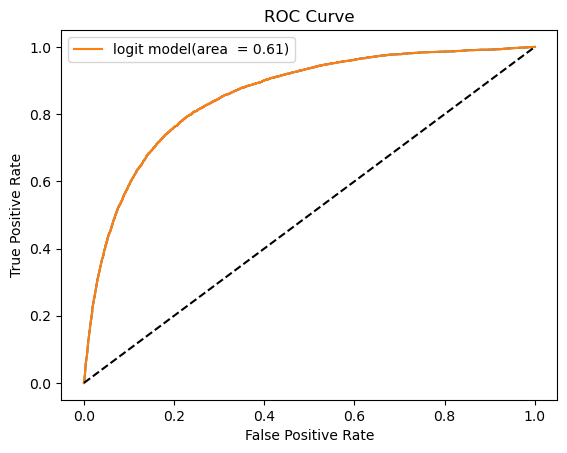

auc accuracy: 0.6056159648391315


In [24]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,model.predict_proba(x)[:,1])
plt.plot(fpr,tpr)
auc=roc_auc_score(y,pred)

plt.title('ROC Curve')
plt.plot(fpr,tpr,label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('auc accuracy:',auc)